## WORK 1 - CLUSTERING ALGORITHMS 

### Numerical dataset: Breast Cancer Wisconsin (Original) dataset

Number of instances: 699

Number of attributes: 9 

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

Source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

## Exploratory data analysis (EDA) and Preprocessin

In [69]:
# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
# we import the pandas and Exploratory Data Analysis and Preprocessing libraries. 
import pandas as pd
from tools import eda as eda
from tools import preprocess as prep

### Read numerical dataset

In [71]:
path = 'datasets/breast-w.arff'

# Read the data set
df = eda.read_arff(path_data=path, url_data=None)

df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,b'benign'
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,b'benign'
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,b'benign'
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,b'benign'
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,b'benign'


### Split data into numerical features and true label values (class)

In [72]:
#Split data in Numerical and Categorical
splits, metadata = eda.split(df, cat_features=None,response='Class')
X_num = splits['X_num']
X_cat = splits['X_cat'] # No categorical features

/home/guess/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [73]:
# True labels of all datapoints
y = splits['y']['Class'].values
X_num.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [74]:
print(f'# instances: {len(X_num)} | # features: {len(X_num.columns)}')
print(f'# num_features: {len(X_num.columns)}')

# instances: 699 | # features: 9
# num_features: 9


In [75]:
metadata

{'n_num_features': 9,
 'n_cat_features': 0,
 'n_instances': 699,
 'n_features': 9,
 'dtypes': {'Clump_Thickness': dtype('float64'),
  'Cell_Size_Uniformity': dtype('float64'),
  'Cell_Shape_Uniformity': dtype('float64'),
  'Marginal_Adhesion': dtype('float64'),
  'Single_Epi_Cell_Size': dtype('float64'),
  'Bare_Nuclei': dtype('float64'),
  'Bland_Chromatin': dtype('float64'),
  'Normal_Nucleoli': dtype('float64'),
  'Mitoses': dtype('float64'),
  'Class': dtype('int64')}}

As we can see no categorical features are present within the Breast Cancer dataset. All numerical features are float data type.

### Check missing values (null values)

In [76]:
print(f'Numerical: {eda.check_null(X_num)}')

Numerical: Clump_Thickness           0
Cell_Size_Uniformity      0
Cell_Shape_Uniformity     0
Marginal_Adhesion         0
Single_Epi_Cell_Size      0
Bare_Nuclei              16
Bland_Chromatin           0
Normal_Nucleoli           0
Mitoses                   0
dtype: int64


As we can see the 'Bare Nuclei' data set contains 16 NaN values, so we are going to replace them by the median of the specified feature. 

In [77]:
# Replace values by the median of the column
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median') #for median imputation replace 'mean' with 'median'
imp_mean.fit(X_num)
X_num_no_nan = imp_mean.transform(X_num)

# The data set is converted to data frame again
X_num_ok = pd.DataFrame(X_num_no_nan, columns=X_num.columns)


# Check null values again:
print(f'Numerical: {eda.check_null(X_num_ok)}')

Numerical: Clump_Thickness          0
Cell_Size_Uniformity     0
Cell_Shape_Uniformity    0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei              0
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
dtype: int64


### Dataset distribution

#### Histogram plot

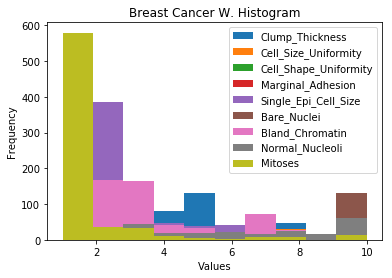

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# ································ Histogram ··················································
X_num_ok.plot(kind='hist')
plt.title('Breast Cancer W. Histogram')
_ = plt.xlabel("Values")
#plt.savefig(fname='numerical_Histogram.png')
plt.show()

By observing this histogram we can conclude that is not the best representation in order to visualize the data distribution of each feature. However, for instance we can extract that the mitoses feature is skewed to the left side and doesn't follow a normal/Gaussian distribution. 

#### Boxplot representation

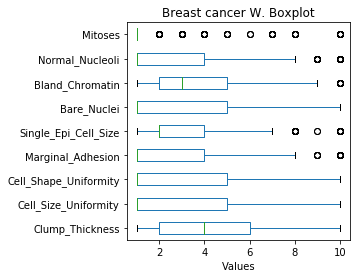

In [79]:
_ = X_num_ok.plot(kind='box',figsize=(4, 4), vert=False)
plt.title('Breast cancer W. Boxplot')
_ = plt.xlabel("Values")
#plt.savefig(fname='numerical_BoxPlot')
plt.show()

As showed in the box plot we can see that outliers (data points that differ significantly from other observations) are present in few features such as Single_Epi_Cell_Size or Marginal_Adhesion, which is further laboratory works are likely to be removed in order to obtain a better clustering analysis as they often indicate measurement error or that "population" have a very heavy-tailed distribution.. However, the main objective of this labwork is not
focused in the outliers removal. Furthermore, we can see that features like Clump_Thikness or Bland_Chromatin follow
a normal/Gaussian distribution. On the other hand, the mitoses feature does not follow a normal distribution as it can also be observed in the Histogram plot, where data frequency does not follow the typical Gaussian shape.
In conclusion, a box plot is a better representation to check the shape distribution of the different attributes within the breast cancer data set as it is composed by a numerous features.

#### Scatter plot

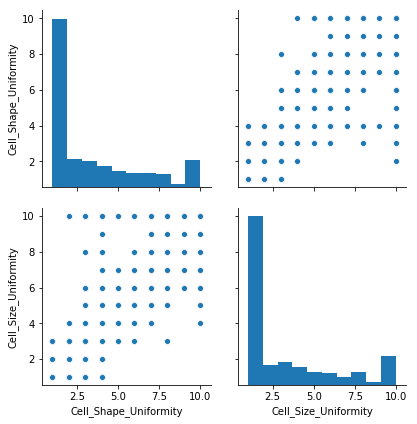

In [80]:
_ = sns.pairplot(X_num_ok[['Cell_Shape_Uniformity','Cell_Size_Uniformity']], height=3)
#plt.savefig(fname='numerical_ScatterPlot')
plt.show()

Using a scatterplot we can find out clusters or groups that appear when plotting two numerical features.
We expect it to has 2 clusters. However, in this case we can't observe any cluster, so it doesn't  give too much information.

#### Correlation matrix

We're going to see if numerical variables are correlated using Pearson metric in our numerical features. 

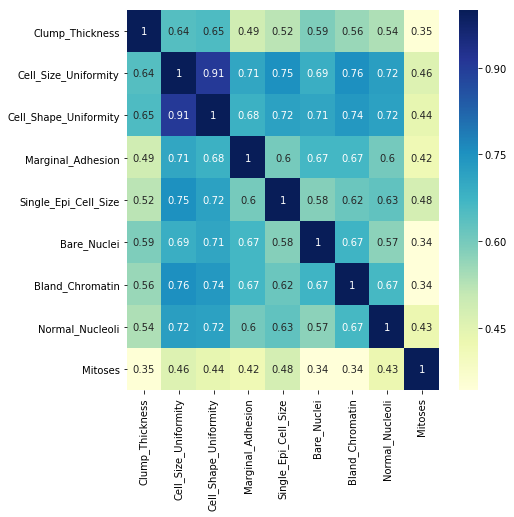

In [81]:
f = plt.figure(figsize=(7, 7))
corr = X_num_ok.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap="YlGnBu");
#plt.savefig(fname='numerical_correlation_matrix')
plt.show()

In this Correlation Matrix we can see that all features except the mitosis one are correlated with intensities above the 50%. Is understandable that the mitosis feature does not correlate with other features as it was the only one that didn't follow a an approximated normal/Gaussian distribution.

#### Scaling numerical data

Many supervised linear models expect features to have a normal distribution (0 mean and unit variance) because if a feature has a different variance and centre, it will dominate and affect the others, making the models unable to learn uniformally across the remaining features. Unsupervised models expect features to have the same range, it means, the same scale when dealing with distances. When there is a lack of scaling, the distances are not comparable.


   Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0         0.206936             -0.699995              -0.743299   
1         0.206936              0.283845               0.266875   
2        -0.503866             -0.699995              -0.743299   
3         0.562336              1.595632               1.613773   
4        -0.148465             -0.699995              -0.743299   

   Marginal_Adhesion  Single_Epi_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
0          -0.633247             -0.549561    -0.686979        -0.179662   
1           0.768621              1.710106     1.799664        -0.179662   
2          -0.633247             -0.549561    -0.410685        -0.179662   
3          -0.633247             -0.097628     0.141902        -0.179662   
4           0.067687             -0.549561    -0.686979        -0.179662   

   Normal_Nucleoli   Mitoses  
0        -0.611825 -0.343912  
1        -0.284112 -0.343912  
2        -0.611825 -0.343912  
3         1.3544

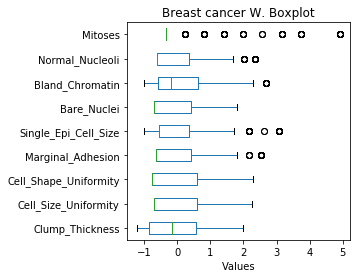

In [82]:
X_num_scaled = prep.scale(X_num_ok)
print(X_num_scaled.head())

_ = X_num_scaled.plot(kind='box',figsize=(4, 4), vert=False)
plt.title('Breast cancer W. Boxplot')
_ = plt.xlabel("Values")
plt.show()

In the boxplot we can see that the range of the values in all features is compressed between -1 and 1 after performing the scaling procedure.
## Clustering Analysis 

In order to visualize the clusters, we need to reduce the dimensionality of X. We're going to show a 2D and 3D scatterplot where dimensions have been reduced to 2 and 3 dimensionalities respectively as it is not humanly possible to see dimensions greater than those.

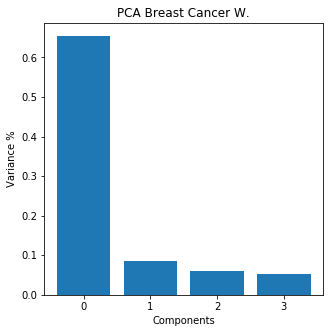

In [83]:
from sklearn.decomposition import PCA

#n_comp= len(X_num_scaled.values[0])//2
#graph_components(X_num_scaled, n_components=n_comp)

pca = PCA(n_components= len(X_num_scaled.values[0])//2)
X_num_scaled_pca = pca.fit_transform(X_num_scaled.values)

list_components = list(range(pca.n_components_))
plt.figure(figsize=(5,5))
plt.bar(list_components, pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Variance %')
plt.xticks(list_components)
plt.title('PCA Breast Cancer W.')
#plt.savefig('numerical_scaled_pca')
plt.show()

As seen in this bar plot of the first 4 components we can see that the first one contains the majority of variance. Then, the second component drops dratically but is sliglthy higer than the other two. We'll consider the two first components to draw the 2D scatter plot.

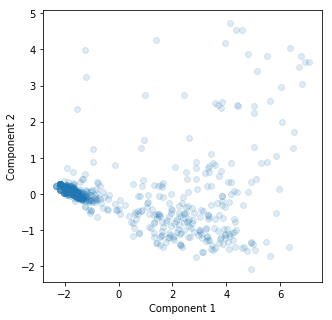

In [84]:
X_num_scaled_pca = pd.DataFrame(X_num_scaled_pca)

f = plt.figure(figsize=(5, 5))
plt.scatter(X_num_scaled_pca[0], X_num_scaled_pca[1], alpha=.14)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
#plt.savefig(fname='numerical_scaled_pca_scatterplot')
plt.show()


With this representation is not easy to see if data is grouped in two clusters or not. Further algorithm procedures need to be implemented in order to see the partitioning of the data. 

**True Labeling**

Before running the Breast Cancer W. dataset into the different cluster algorithms we're going to plot the true labels of each datapoint to be able to compare the results with the real one. 

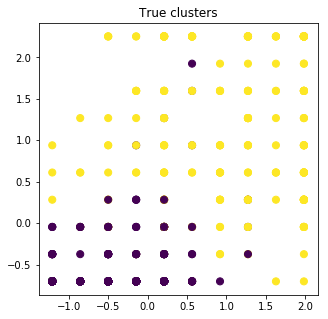

In [85]:
# True clusters with the scaled numerical data:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X_num_scaled.values[:, 0], X_num_scaled.values[:, 1], c=y,
            s=50, cmap='viridis');
plt.title('True clusters')
#plt.savefig(fname='numerica_true_clusters_2D')
plt.show()

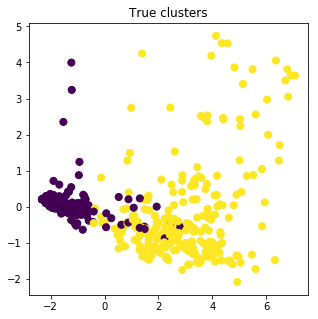

In [86]:
# True clusters using the 2 principal components:
X_num_scaled_pca = pd.DataFrame(X_num_scaled_pca)
X_num_scaled_pca.head()

fig = plt.figure(figsize=(5, 5))
plt.scatter(X_num_scaled_pca.values[:, 0], X_num_scaled_pca.values[:, 1], c=y,
            s=50, cmap='viridis');
plt.title('True clusters')
#plt.savefig(fname='numerical_true_clusters_2D_PCA')
plt.show()

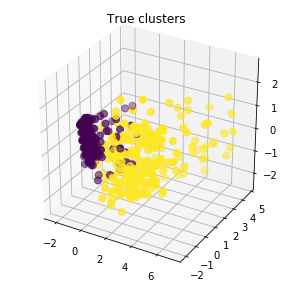

In [87]:
# 3 principal components (3D scatter plot)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

x = X_num_scaled_pca.values[:, 0]
_y = X_num_scaled_pca.values[:, 1]
z = X_num_scaled_pca.values[:, 2]

ax.scatter(x, _y, z, c=y, s=50, cmap='viridis')
plt.title('True clusters')
#plt.savefig(fname='numerical_true_clusters_3D_PCA')
plt.show()

**Agglomerative Clustering**

The agglomerative clustering is the most common type of hierarchical clustering used to group data points in clusters based on their similarity. The algorithm starts by treating each datapoint as a single cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all datapoints. 

In order to decide which datapoint/clusters should be combined or divided, the euclidean distance and cosine are the methods that we are going to implement for measuring the similarity between datapoints.  

The linkage function takes the distance information from the euclidean or cosine distances and groups pairs of datapoints into clusters based on their similarity. Next, these newly formed clusters are linked to each other to create bigger clusters. Clusters can be linked in three different ways:

* Complete: distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2.
* Average: The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2.
* Single: distance between two clusters is defined as the minimum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. 

Source:https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/#linkage

The sklearn.cluster library contains the AgglomerativeClustering function that's the one we're going to implement into our numerical dataset. In addition, different metrics are going to be computed in order to verify if Agglomerative method behaves correctly or not in the cluster procedure.

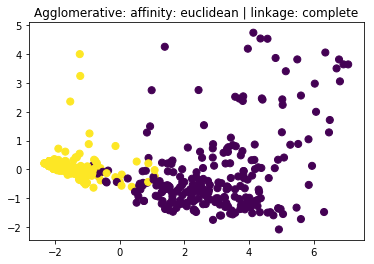

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Metrics: {'ars': 0.8769414093574075, 'purity': 0.9685264663805436, 'db': 0.8412034620974418, 'f-measure': 0.9551020408163265, 'silhouette': 0.5588436921196462}


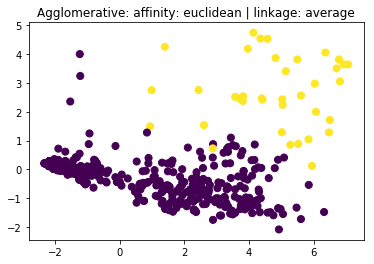

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Metrics: {'ars': 0.10404778329852474, 'purity': 0.7081545064377682, 'db': 0.9146981194299963, 'f-measure': 0.2661870503597123, 'silhouette': 0.4941823279601219}


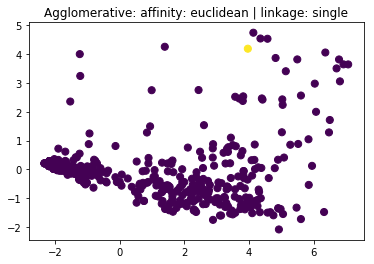

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Metrics: {'ars': 0.002574746428175956, 'purity': 0.6566523605150214, 'db': 0.39921854497150056, 'f-measure': 0.008264462809917356, 'silhouette': 0.48745443098320435}


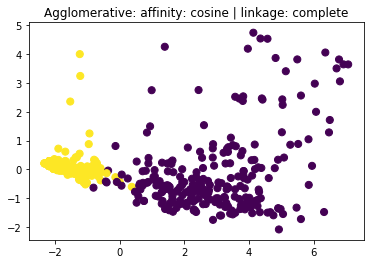

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Metrics: {'ars': 0.866273766968681, 'purity': 0.9656652360515021, 'db': 0.8344751968188499, 'f-measure': 0.9516129032258065, 'silhouette': 0.5596821935066216}


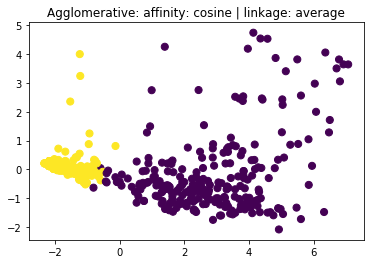

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Metrics: {'ars': 0.8663889101480748, 'purity': 0.9656652360515021, 'db': 0.8418651041300095, 'f-measure': 0.9521912350597609, 'silhouette': 0.5519542238260294}


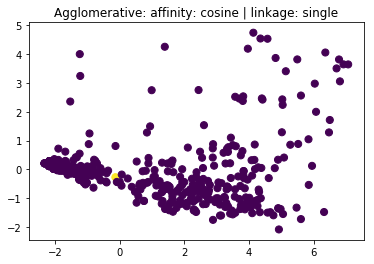

Metrics: {'ars': 0.002574746428175956, 'purity': 0.6566523605150214, 'db': 1.7205702409961863, 'f-measure': 0.008264462809917356, 'silhouette': -0.12854848758633836}


/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [88]:
from sklearn.cluster import AgglomerativeClustering
from cluster.metrics import get_metrics

affinity = ['euclidean', 'cosine']
linkage = ["complete", "average", "single"]

for aff in affinity:
    for link in linkage:
        agglo = AgglomerativeClustering(affinity=aff, compute_full_tree='auto',
                                        linkage=link, memory=None, n_clusters=2,
                                        pooling_func='deprecated')
        agglo.fit(X_num_scaled.values)
        # representation using the two principal components
        plt.scatter(X_num_scaled_pca.values[:, 0], X_num_scaled_pca.values[:, 1], c=agglo.labels_,
                    s=50, cmap='viridis');

        plt.title(f'Agglomerative: affinity: {aff} | linkage: {link}')
        #plt.savefig('numerical_agglo_affinity('+affinity+' and '+linkage')')
        plt.show()
        print(f"Metrics: {get_metrics(y, agglo.labels_, X_num_scaled, alg='agglomerative')}")

**Agglomerative validation**

In [89]:
# Different metrics
from cluster.metrics import get_metrics
aff = 'euclidean'
link = 'complete'
agglo = AgglomerativeClustering(affinity=aff, compute_full_tree='auto',
                                        linkage=link, memory=None, n_clusters=2,
                                        pooling_func='deprecated')
agglo.fit(X_num_scaled)

print(get_metrics(y,agglo.labels_,X_num_scaled,alg='agglo'))

{'ars': 0.8769414093574075, 'purity': 0.9685264663805436, 'db': 0.8412034620974418, 'f-measure': 0.9551020408163265, 'silhouette': 0.5588436921196462}


/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


**Confusion matrix Agglomerative**

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score

def rename_labels(y_true, y_pred):
    from scipy.stats import mode
    mapping = {}
    for cat in set(y_true):
        predictions = y_pred[y_true == cat]
        predictions = [p for p in predictions if p not in list(mapping.values())]
        mapping[cat] = mode(predictions)[0][0]
    
    result = y_pred.copy()
    for cat in set(y_true):
        result[y_pred == mapping[cat]] = cat
    return result


In [91]:
aff = 'euclidean'
link = 'complete'
agglo = AgglomerativeClustering(affinity=aff, compute_full_tree='auto',
                                        linkage=link, memory=None, n_clusters=2,
                                        pooling_func='deprecated')
agglo.fit(X_num_scaled)
y_pred = agglo.labels_
y_pred_renamed = rename_labels(y,y_pred)
print('Confusion matrix agglomerative:\n',confusion_matrix(y,y_pred_renamed))
print('Accuracy score agglomerative:\n',accuracy_score(y,y_pred_renamed))


Confusion matrix agglomerative:
 [[443  15]
 [  7 234]]
Accuracy score agglomerative:
 0.9685264663805436


**K-means**

The K-means clustering algorithm is based in classify n datapoints into k clusters in which each datapoint belongs to the cluster with the nearest mean. K-Means minimizes within-cluster variances using squared Euclidean distances. 

Source:https://en.wikipedia.org/wiki/K-means_clustering

Before analysing the K-means algorithm results fot the Breast Cancer W. dataset, it is important to know which is the
random state that performs a better clustering. To do this, we have chosen the adjusted rand score as a metric in order to know which random state gives the best result.

In [92]:
# best random score:
from cluster.kmeans import KMeans
from sklearn.metrics import adjusted_rand_score

best_clusters = None
best_centroids = None
best_r = None
best_score = -9999
for r in range(20):
    kme = KMeans(n_clusters=2, random_state=r)
    kme.fit(X_num_scaled.values)
    score = adjusted_rand_score(y, kme.labels)
    if score > best_score:
        best_clusters = kme.labels
        best_centroids = kme.centroids
        best_score = score
        best_r = r
fcm_clusters = best_clusters
print('Best score:',best_score)
print('Best random state value:',best_r)

Best score: 0.844455715380993
Best random state value: 0


In [93]:
kme = KMeans(n_clusters=2, random_state=0)
kme.fit(X_num_scaled.values)
centroids = kme.centroids
clusters = kme.labels

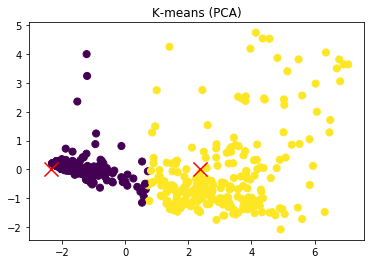

In [94]:
# K-means cluster visualization with the two principal components:
plt.scatter(X_num_scaled_pca.values[:, 0], X_num_scaled_pca.values[:, 1], c=clusters,
            s=50, cmap='viridis');
centroids_pca = PCA(n_components=2).fit_transform(kme.centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='x', c='r', s=200);
plt.title('K-means (PCA)')
#plt.savefig(fname='numerical_kmeans')
plt.show()

**K means validation**

In [95]:
# Different metrics
from cluster.metrics import get_metrics
from cluster.kmeans import KMeans

print(get_metrics(y,kme.labels,X_num_scaled,alg='kmeans'))

{'ars': 0.844455715380993, 'purity': 0.9599427753934192, 'db': 0.822282881638738, 'f-measure': 0.9414225941422594, 'silhouette': 0.5732185934794677}


/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


For n_clusters = 2 The average silhouette_score is : 0.5732185934794677
For n_clusters = 3 The average silhouette_score is : 0.25560189005346035
For n_clusters = 4 The average silhouette_score is : 0.2347549859105958


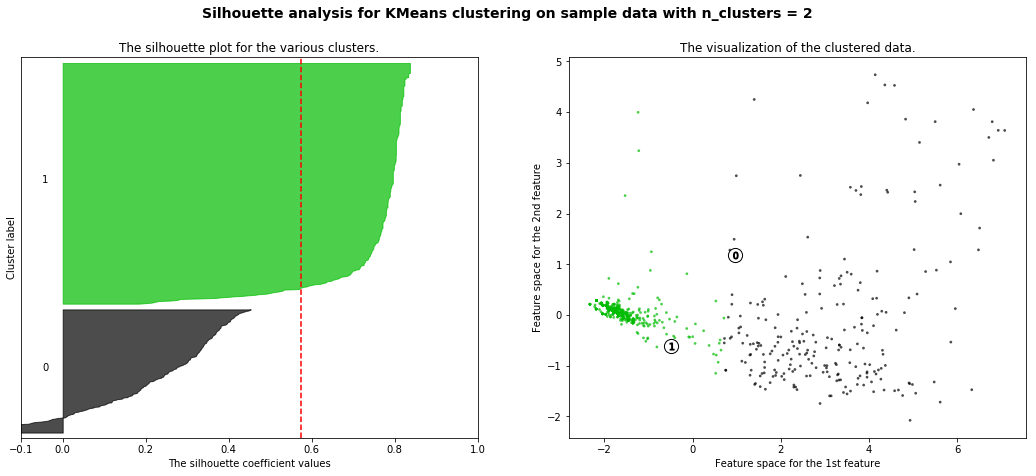

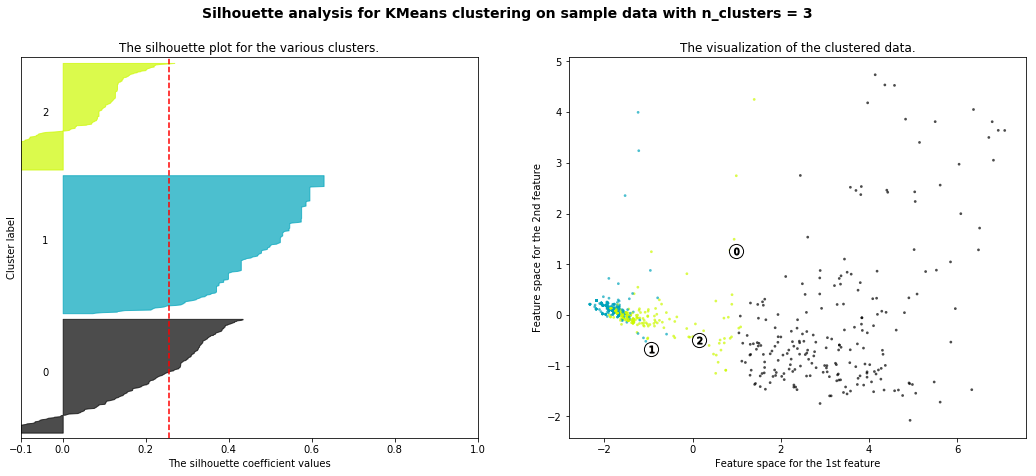

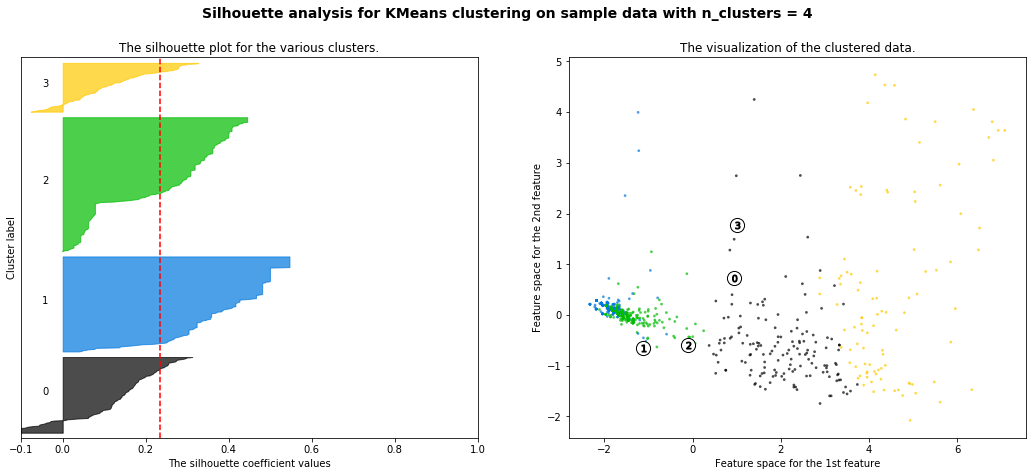

In [96]:
# SILHOUETTE SCORE
from cluster.metrics import silhouette

range_n_clusters = [2,3,4]

silhouette(X_num_scaled, X_num_scaled_pca, alg='kmeans', range_clusters=range_n_clusters)

# Negatives values mean that samples might have been assigned to the wrong cluster. Values close to zero mean that
# samples are near the boundaries. Values close to +1 mean that each cluster is far away to its neighboring cluster.
# We can see that the best score goes to both n_clusters=2 and n_clusters=3. The closer to +1 the more separate are
# ach class from each other (perfect separation).

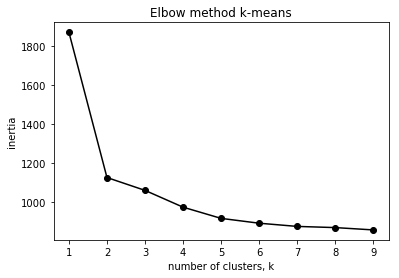

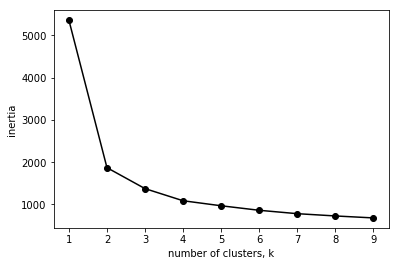

In [97]:
# Implemented elbow method from the own Kmeans code:
inertias = []
ks = range(1,10)
for k in ks:
    kme = KMeans(n_clusters=k, random_state=10)
    kme.fit(X_num_scaled.values)
    inertias.append(kme.inertia)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow method k-means')
#plt.savefig(fname='numerical_kmeans_inertia')
plt.show()

# Elbow plot obtained from the KMeans code of the sklearn.cluster (to verify)
from sklearn.cluster import KMeans

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9]
inertias = []
for k in range(1, 10):
    model = KMeans(k)
    model.fit(X_num_scaled_pca.values)

    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**Confusion matrix and accuracy score K-means:**

In [98]:
from cluster.metrics import KMeans
kme = KMeans(n_clusters=2, random_state=0)
kme.fit(X_num_scaled.values)

y_pred_renamed = rename_labels(y,kme.labels)
print('Confusion matrix K-means:\n',confusion_matrix(y,y_pred_renamed))
print('Accuracy score K-means:\n',accuracy_score(y,y_pred_renamed))

Confusion matrix K-means:
 [[446  12]
 [ 16 225]]
Accuracy score K-means:
 0.9599427753934192


#### K-modes

As we're dealing with numerical data type we need to transform it to category data type or string as K-modes is used in order to classify categorical data. 

In [99]:
# Data binning:
X_cat = X_num_scaled.copy()
X_cat_binned = prep.binning(X_cat,n_classes=2)

In [100]:
X_cat_binned.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0


In [101]:
# Encode the binned data:
X_cat_encoded = prep.encode(X_cat_binned)
X_cat_encoded.head()

Feature: Clump_Thickness      | # categories: 2
Feature: Cell_Size_Uniformity | # categories: 2
Feature: Cell_Shape_Uniformity | # categories: 2
Feature: Marginal_Adhesion    | # categories: 2
Feature: Single_Epi_Cell_Size | # categories: 2
Feature: Bare_Nuclei          | # categories: 2
Feature: Bland_Chromatin      | # categories: 2
Feature: Normal_Nucleoli      | # categories: 2
Feature: Mitoses              | # categories: 2

Binary cat_features: ['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity', 'Marginal_Adhesion', 'Single_Epi_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
Remaining cat_features: []


,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0


In [102]:
# New data type:
X_cat_encoded.dtypes

Clump_Thickness          int64
Cell_Size_Uniformity     int64
Cell_Shape_Uniformity    int64
Marginal_Adhesion        int64
Single_Epi_Cell_Size     int64
Bare_Nuclei              int64
Bland_Chromatin          int64
Normal_Nucleoli          int64
Mitoses                  int64
dtype: object

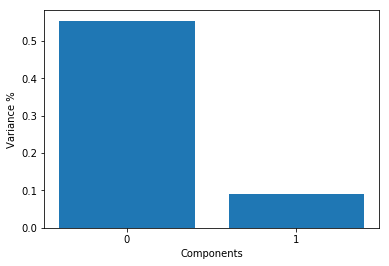

In [103]:
# PCA with categorical data 
n_comp = 2
prep.graph_components(X_cat_encoded, n_components=n_comp) # we can't visualize right now

In [104]:
from cluster.kmodes import KModes

best_clusters = None
best_centroids = None
best_r = None
best_score = -9999
for r in range(1,20):
    km = KModes(n_clusters=2, random_state=r)
    km.fit(X_cat_encoded.values)
    score = adjusted_rand_score(y, km.labels)
    if score > best_score:
        best_clusters = km.labels
        best_centroids = km.centroids
        best_score = score
        best_r = r
fcm_clusters = best_clusters
print('Best score:',best_score)
print('Best random state value:',best_r)

Best score: 0.6118757596617376
Best random state value: 4


In [105]:
# K-modes clustering
from cluster.kmodes import KModes

km = KModes(n_clusters=2, random_state=4)
km.fit(X_cat_encoded.values)

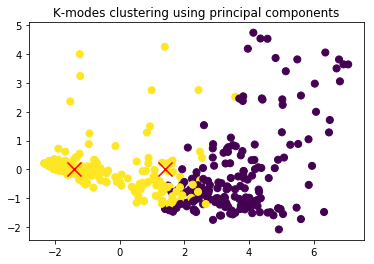

In [106]:
X_cat_pca = PCA(n_components=n_comp).fit_transform(X_cat_encoded.values)
X_cat_pca = pd.DataFrame(X_cat_pca)

plt.scatter(X_num_scaled_pca.values[:, 0], X_num_scaled_pca.values[:, 1], c=km.labels,
            s=50, cmap='viridis');

centroids_pca = PCA(n_components=2).fit_transform(km.centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='x', c='r', s=200);
plt.title('K-modes clustering using principal components')
plt.savefig(fname='numerical_kmodes')
plt.show()

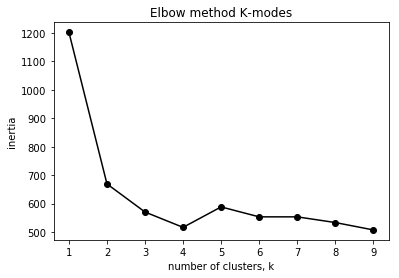

In [107]:
inertias = []
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for k in range(1, 10):
    km = KModes(n_clusters=k, random_state=4)
    if km is not None:
        km.fit(X_cat_encoded.values)
        inertias.append(km.inertia)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow method K-modes')
#plt.savefig(fname='numerical_kmodes_inertia')
plt.show()

**K-modes validation**

In [108]:
# Metrics K-modes
from cluster.metrics import get_metrics
km = KModes(n_clusters=2, random_state=1)
km.fit(X_cat.values)
print(get_metrics(y, km.labels, X_cat, alg='kmodes'))


{'ars': 0.7762805137124743, 'purity': 0.9413447782546495, 'db': 0.8600877882413123, 'f-measure': 0.9125799573560768, 'silhouette': 0.618380221758344}


/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


For n_clusters = 2 The average silhouette_score is : 0.618380221758344
For n_clusters = 3 The average silhouette_score is : 0.19229754391333487
For n_clusters = 4 The average silhouette_score is : 0.11288667987151038


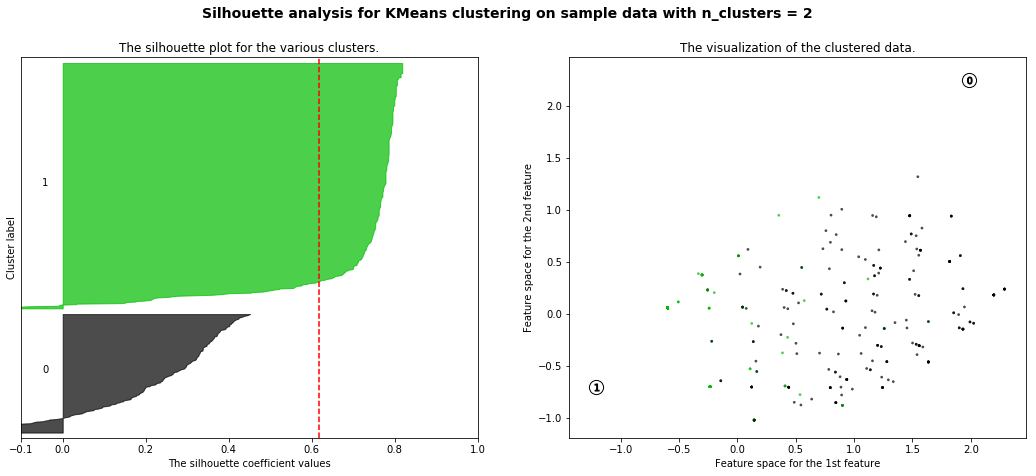

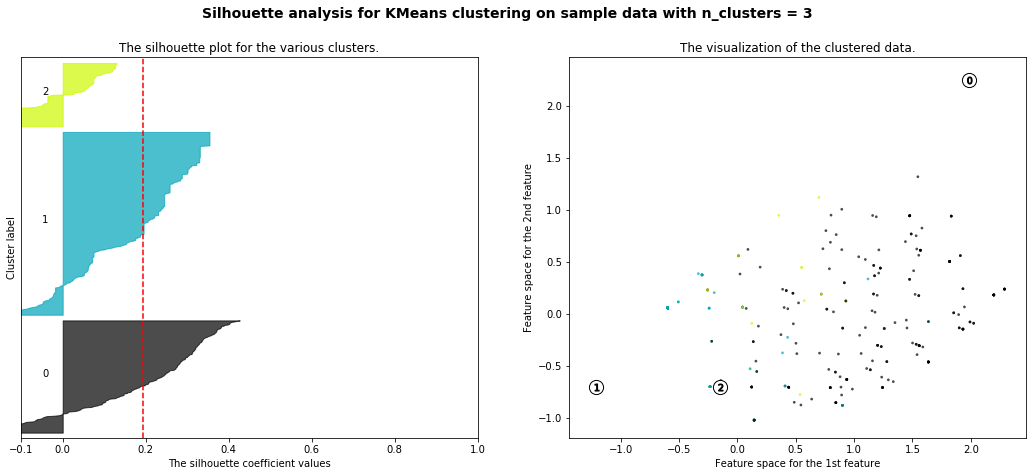

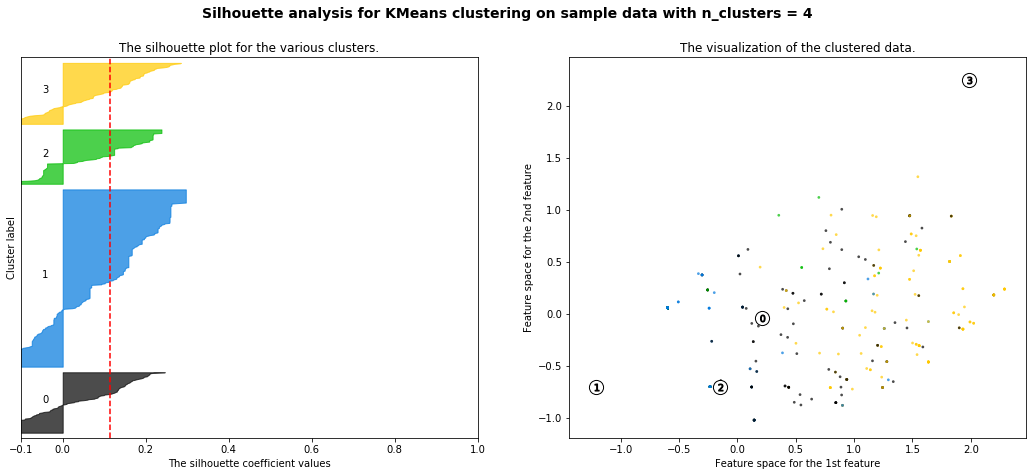

In [109]:
# Silhouette score k-modes
from cluster.metrics import silhouette

range_n_clusters = [2, 3,4]
silhouette(X_cat, X_cat_pca, alg='kmodes', range_clusters=range_n_clusters)

**K-prototypes**

In [110]:
# best random state
from cluster.kprototypes import KPrototypes
best_clusters = None
best_centroids = None
best_r = None
best_score = -9999
for r in range(20):
    kp = KPrototypes(n_clusters=2, random_state=r)
    kp.fit(X_num_scaled.values)
    score = adjusted_rand_score(y, kp.labels)
    if score > best_score:
        best_clusters = kme.labels
        best_centroids = kme.centroids
        best_score = score
        best_r = r
fcm_clusters = best_clusters
print('Best score:',best_score)
print('Best random state value:',best_r)

Best score: 0.8282755162709584
Best random state value: 8


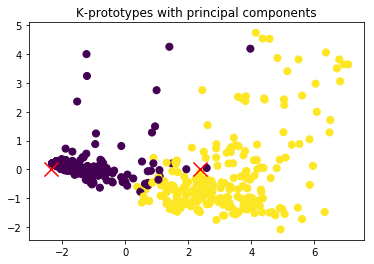

In [111]:
# Visaulization k-prototypes
from cluster.kprototypes import KPrototypes

kp = KPrototypes(n_clusters=2, cat_features=[], random_state=8)
kp.fit(X_num_scaled.values)

# Scatter plot with two principal components
plt.scatter(X_num_scaled_pca.values[:, 0], X_num_scaled_pca.values[:, 1], c=kp.labels,
            s=50, cmap='viridis');

centroids_pca = PCA(n_components=2).fit_transform(kp.centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='x', c='r', s=200);
plt.title('K-prototypes with principal components')
#plt.savefig(fname='numerical_kprototypes')
plt.show()

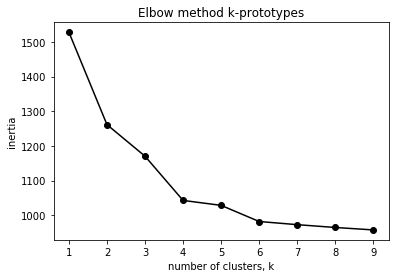

In [112]:
# Elbow method
inertias = []
ks = range(1,10)
for k in ks:
    kp = KPrototypes(n_clusters=k, random_state=8)
    kp.fit(X_num_scaled.values)
    inertias.append(kp.inertia)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow method k-prototypes')
#plt.savefig(fname='numerical_kprototypes_inertia')
plt.show()

Here we can't clearly see an elbow in k=2 as expected, in fact the inertia starts to smooth at k=4 which means that the K-prototypes algorithm may is looking for other classes due the presence of latent instances. 

**Validation K-prototypes**

In [113]:
# metrics K-prototypes
from cluster.metrics import get_metrics

kp = KPrototypes(n_clusters=2, cat_features=[], random_state=8)
kp.fit(X_num_scaled.values)

print(get_metrics(y, kp.labels, X_num_scaled, alg='kproto'))

{'ars': 0.8282755162709584, 'purity': 0.9556509298998569, 'db': 0.8342486182205341, 'f-measure': 0.9339019189765458, 'silhouette': 0.6325712764988081}


/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


**Fuzzy C Means**

Fuzzy C means: Within unsupervised learning Fuzzy C-means is one of the most widely used fuzzy algorithms for grouping data, we want an element to know the degree of belonging to the different groupings into which the initial set of data can be divided. In fuzzy C-means algorithms every element belongs to a fuzzy set with a degree of membership that varies from 0 to 1. 

* First, a number of cluster is chosen. Secondly, random coefficients are assigned to each data point for being into a specific cluster. 
* Then, centroids for each cluster are computed taking into a count the fuzzifier coefficient "m" and as well distances between data points and clusters, by using euclidean distance, are calculated. The fuzzifier parameter controls "how" fuzzy the clusters tend to be and need to have a value m >1, normally m=2. 

This process is repeated until the algorithm has converged,the difference of coefficients between two successive iterations is less than a toleration number.

In [114]:
# The membership matrix which contains the degree of belonging to the different clusters first needs to be normalized 
# to 1 for the maximum degree value else 0. Next, the label of each datapoint is associated depending to which cluster
# it belong each datapoint. 

import numpy as np
def U_normalized(U):
    """
    This function de-fuzzifies the U. It replace the max value of each data point list for a 1 and the others are
    replaced by 0.
  """
    for i in range(0, len(U)):
        maximum = max(U[i])
        for j in range(0, len(U[0])):
            if U[i][j] != maximum:
                U[i][j] = 0
            else:
                U[i][j] = 1
    return U


def clusters_fcm(Un):
    """
    This function computes an array with the assigned cluster of each datapoint after performing the FCM algorithm.
    """
    clust = []
    for i in range(len(Un)):
        if Un[i][0] == 1:
            clust.append(0)
        else:
            clust.append(1)

    return np.array(clust)

In [115]:
# best random state
from cluster.fuzzycmeans import FuzzyCMeans2

best_clusters = None
best_centroids = None
best_r = None
best_score = -9999

for r in range(20):
    fcm = FuzzyCMeans2(n_clusters = 2,random_state = r,m = 2,max_iter = 100,toleration = 0.01)
    fcm.fit(X_num_scaled.values)
    Un = U_normalized(fcm.U)
    clusters = clusters_fcm(Un)
    centroids = np.array(fcm.V)
    score = adjusted_rand_score(y, clusters)
    if score > best_score:
        best_clusters = clusters
        best_centroids = centroids
        best_score = score
        best_r = r
fcm_clusters = best_clusters
print(best_score)
print(best_r)

0.8020326120478942
0


In [116]:
# Fuzzy C means with the best random state score
from cluster.fuzzycmeans import FuzzyCMeans2
fcm = FuzzyCMeans2(n_clusters = 2,random_state = 0,m = 2,max_iter = 100,toleration = 0.01)
fcm.fit(X_num_scaled.values)


In [117]:
fcm.iterations

[0, 1, 2, 3, 4, 5, 6, 7, 8]

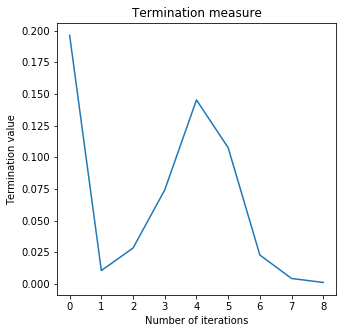

In [118]:
# Termination measure:
fig = plt.figure(figsize=(5, 5))
plt.plot(fcm.iterations,fcm.termination_values)
plt.title('Termination measure')
plt.ylabel('Termination value')
plt.xlabel('Number of iterations')
#plt.savefig(fname='numerical_fcm_termination_measure')
plt.show()

Until the ninth iteration the termination value doesn't reach the threshold of 0.01, then the algorithm is finished according to the given toleration value. 

Adjusted random score: 0.8020326120478942


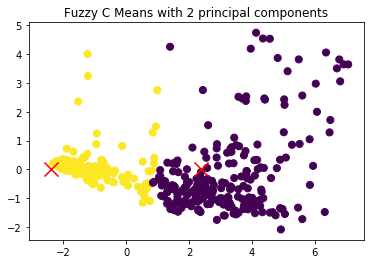

In [119]:
# Scatter plot FCM

U = fcm.U
Un = U_normalized(U)
clusters = clusters_fcm(Un)
centroids = np.array(fcm.V)

# Representations without PCA
print('Adjusted random score:',adjusted_rand_score(y, clusters))
plt.scatter(X_num_scaled_pca.values[:, 0], X_num_scaled_pca.values[:, 1], c=clusters,s=50, cmap='viridis');
centroids_pca = PCA(n_components=2).fit_transform(fcm.V)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='x', c='r', s=200)
plt.title('Fuzzy C Means with 2 principal components')
#plt.savefig('numerical_fcm')
plt.show()

**Validation Fuzzy C means**

In [120]:
# metrics FCM
from cluster.metrics import get_metrics

# CLASS to categorical
print(get_metrics(y, clusters, X_num_scaled, alg='fuzzy'))

{'ars': 0.8020326120478942, 'purity': 0.9484978540772532, 'db': 0.8226483217187432, 'f-measure': 0.923076923076923, 'silhouette': 0.5746526466904877}


/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [121]:
# Best C for the Fuzzy C means algorithm: 
from sklearn.metrics import silhouette_score
for k in range(2,10):
    fcm = FuzzyCMeans2(n_clusters = k,random_state = 0,m = 2,max_iter = 100,toleration = 0.01)
    fcm.fit(X_num_scaled.values)
    U = fcm.U
    Un = U_normalized(U)
    clusters = clusters_fcm(Un)
    print('Number of clusters FCM =',k,'--> Silhouette score:',silhouette_score(X_num_scaled,clusters))

Number of clusters FCM = 2 --> Silhouette score: 0.5746526466904877
Number of clusters FCM = 3 --> Silhouette score: 0.3123252948045884
Number of clusters FCM = 4 --> Silhouette score: -0.010813556756042326
Number of clusters FCM = 5 --> Silhouette score: 0.5088287526691342
Number of clusters FCM = 6 --> Silhouette score: 0.27583837276470397
Number of clusters FCM = 7 --> Silhouette score: 0.2851626649714613
Number of clusters FCM = 8 --> Silhouette score: 0.5055396507275464
Number of clusters FCM = 9 --> Silhouette score: 0.2405519335294205


After testing different k values we can say that the best C for the Fuzzy C means algorithm is C=2 according to the Silhouette score criterion. 